# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
print('aqua is loaded')
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall
print('diagnostic is loaded')

aqua is loaded
diagnostic is loaded


##### Loading the low-resolution arxiv 

#### ICON, ngc3028, lra

In [ ]:
reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
icon_ngc3028    = reader.retrieve()
icon_ngc3028    = icon_ngc3028['tprate'][:]*86400
icon_ngc3028.attrs['units'] = "mm/day"

#### IFS, tco2559-ng5, lra

In [ ]:
reader              = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly") 
ifs_tco2559_ng5     = reader.retrieve()
ifs_tco2559_ng5     = ifs_tco2559_ng5['tprate'][:]*86400 
ifs_tco2559_ng5.attrs['units'] = "mm/day"


#### IFS, tco1279-orca025-cycle3, lra

In [ ]:
reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
ifs_tco1279_orca025     = reader.retrieve()
ifs_tco1279_orca025     = ifs_tco1279_orca025['tprate'][:]*86400
ifs_tco1279_orca025.attrs['units'] = "mm/day"

ifs_tco1279_orca025 = ifs_tco1279_orca025.dropna(dim='time')

#### MSWEP, monthly 

In [5]:
reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
mswep_mon               = reader.retrieve(regrid=True)
mswep_mon               = mswep_mon['tprate'][:]*86400
mswep_mon.attrs['units'] = "mm/day"
#mswep_mon = mswep_mon.reindex(lat=list(reversed(mswep_mon.lat)))

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=20**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin**     
    

In [2]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 1000, first_edge = 0, width_of_bin = 1, loglevel='debug')

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF.
##### The paths to the repositories, where the diagnostic store the output, are 

In [3]:
# Please change the path to the NetCDF files and the PDF files to your own path

path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
path_to_mean = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/mean/"
path_to_pdf    = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

#### The function `histogram` calculates and stores the histograms in a specified repository. 

In [ ]:
hist_icon_ngc3028 = diag.histogram(icon_ngc3028, path_to_histogram=path_to_netcdf, name_of_file="icon_ngc3028_lra_r100_monthly")

In [ ]:
hist_ifs_tco2559_ng5 = diag.histogram(ifs_tco2559_ng5, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

In [ ]:
hist_ifs_tco1279_orca025 = diag.histogram(ifs_tco1279_orca025, path_to_histogram=path_to_netcdf, name_of_file="ifs_tco2559_ng5_lra_r100_monthly")

In [ ]:
hist_mswep_mon = diag.histogram(mswep_mon, path_to_histogram=path_to_netcdf, name_of_file="mswep_past_monthly_r100")

In [ ]:
hist_mswep_mon.attrs

##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  
##### Below we compare the precipitation pdf with the units `mm/day`. Units of precipitation: mm  day**-1

2023-07-20 01:27:31 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


{<Axes: title={'center': 'Monthly, 1 degree res (100km)'}, xlabel='Precipitation, [mm/day]', ylabel='PDF'>,
 <Figure size 800x500 with 1 Axes>}

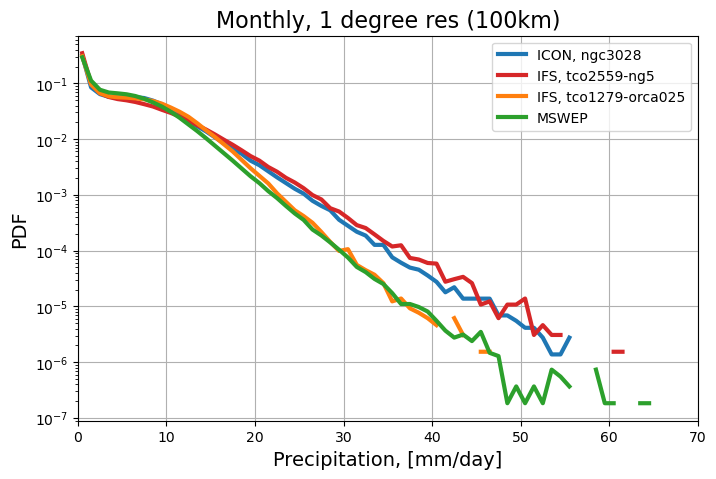

In [13]:
add = diag.histogram_plot(hist_icon_ngc3028,    figsize=1, 
                new_unit="mm/day",
                legend='ICON, ngc3028')
diag.histogram_plot(hist_ifs_tco2559_ng5,       add = add,  color ='tab:red', 
                new_unit="mm/day",
                legend='IFS, tco2559-ng5') 
diag.histogram_plot(hist_ifs_tco1279_orca025,   add = add,  color ='tab:orange', 
                new_unit="mm/day",
                legend='IFS, tco1279-orca025') 
diag.histogram_plot(hist_mswep_mon,             add = add,  color ='tab:green', 
                new_unit="mm/day",
                legend='MSWEP', xmax = 70, 
                plot_title='Monthly, 1 degree res (100km)', loc='upper right',
                path_to_pdf=path_to_pdf, 
                pdf_format=False, 
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison')

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `plot_of_average()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `average_into_netcdf(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

In [ ]:
diag.average_into_netcdf(ifs_tco1279_orca025, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco1279_orca025_lra')

diag.average_into_netcdf(ifs_tco1279_orca025, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco1279_orca025_lra')

In [ ]:
diag.average_into_netcdf(icon_ngc3028, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='icon_ngc3028_lra')

diag.average_into_netcdf(icon_ngc3028, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='icon_ngc3028_lra')

In [ ]:
diag.average_into_netcdf(ifs_tco2559_ng5, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco2559_ng5_lra')

diag.average_into_netcdf(ifs_tco2559_ng5, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='ifs_tco2559_ng5_lra')

In [ ]:
diag.average_into_netcdf(mswep_mon, coord='lon', trop_lat=90,
                         path_to_netcdf=path_to_mean,  name_of_file='mswep_mon_lra')

diag.average_into_netcdf(mswep_mon, coord='lat', trop_lat=15,
                         path_to_netcdf=path_to_mean,  name_of_file='mswep_mon_lra')

2023-07-21 02:47:16 :: Trop. Rainfall :: DEBUG    -> Latitude coordinate is used.
2023-07-21 02:47:16 :: Trop. Rainfall :: DEBUG    -> Latitude coordinate is used.
2023-07-21 02:47:16 :: Trop. Rainfall :: DEBUG    -> Latitude coordinate is used.
2023-07-21 02:47:16 :: Trop. Rainfall :: DEBUG    -> Latitude coordinate is used.
2023-07-21 02:47:16 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


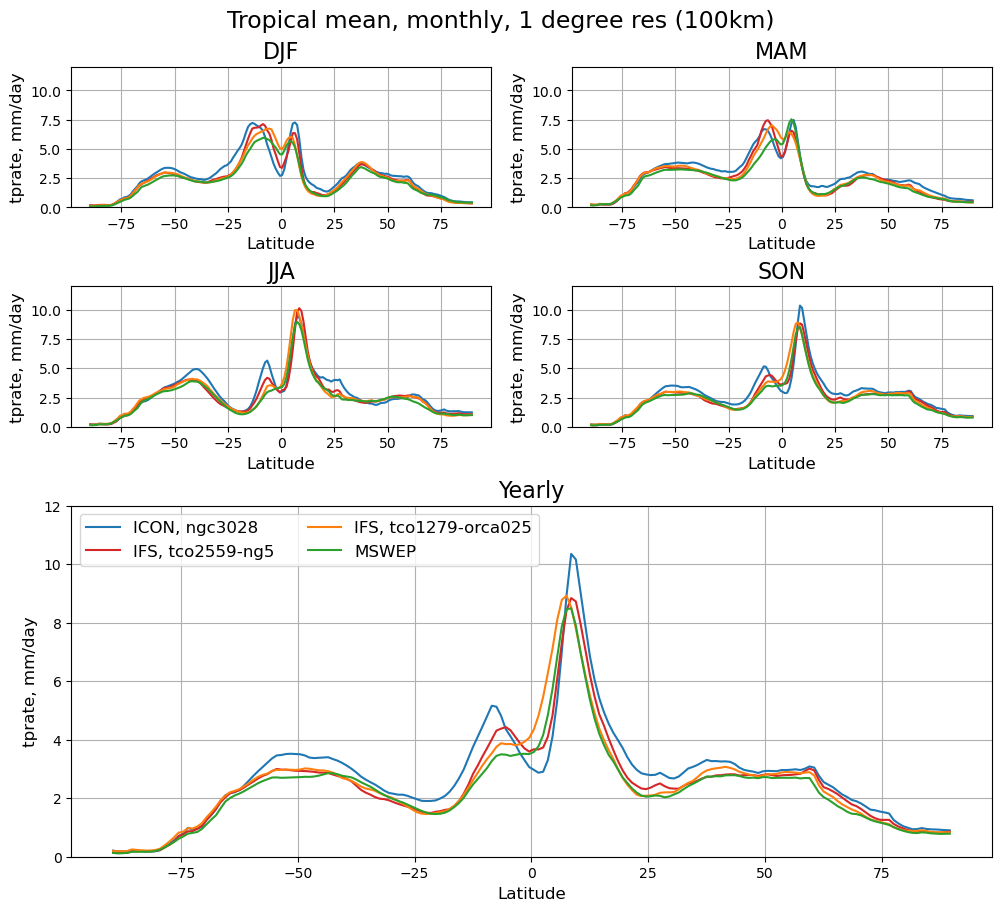

In [5]:
diag.trop_lat=90
add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_icon_ngc3028_lra_lon_2020-09-01T00_2024-11-01T00_histogram.nc",                  
                                legend='ICON, ngc3028',         color='tab:blue', figsize=0.9)

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco2559_ng5_lra_lon_2020-09-15T00_2024-11-15T00_histogram.nc",    
                                fig=add,    
                                legend='IFS, tco2559-ng5',      color='tab:red')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco1279_orca025_lra_lon_2020-09-15T00_2024-11-15T00_histogram.nc", 
                                fig=add,    
                                legend='IFS, tco1279-orca025',  color='tab:orange')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_mswep_mon_lra_lon_1979-09-01T00_2020-11-01T00_histogram.nc",          
                                fig=add,   
                                legend='MSWEP',                 color='tab:green',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf,
                                pdf_format=False,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lon')

2023-07-21 02:46:57 :: Trop. Rainfall :: DEBUG    -> Longitude coordinate is used.
2023-07-21 02:46:58 :: Trop. Rainfall :: DEBUG    -> Longitude coordinate is used.
2023-07-21 02:46:58 :: Trop. Rainfall :: DEBUG    -> Longitude coordinate is used.
2023-07-21 02:46:58 :: Trop. Rainfall :: DEBUG    -> Longitude coordinate is used.
2023-07-21 02:46:58 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


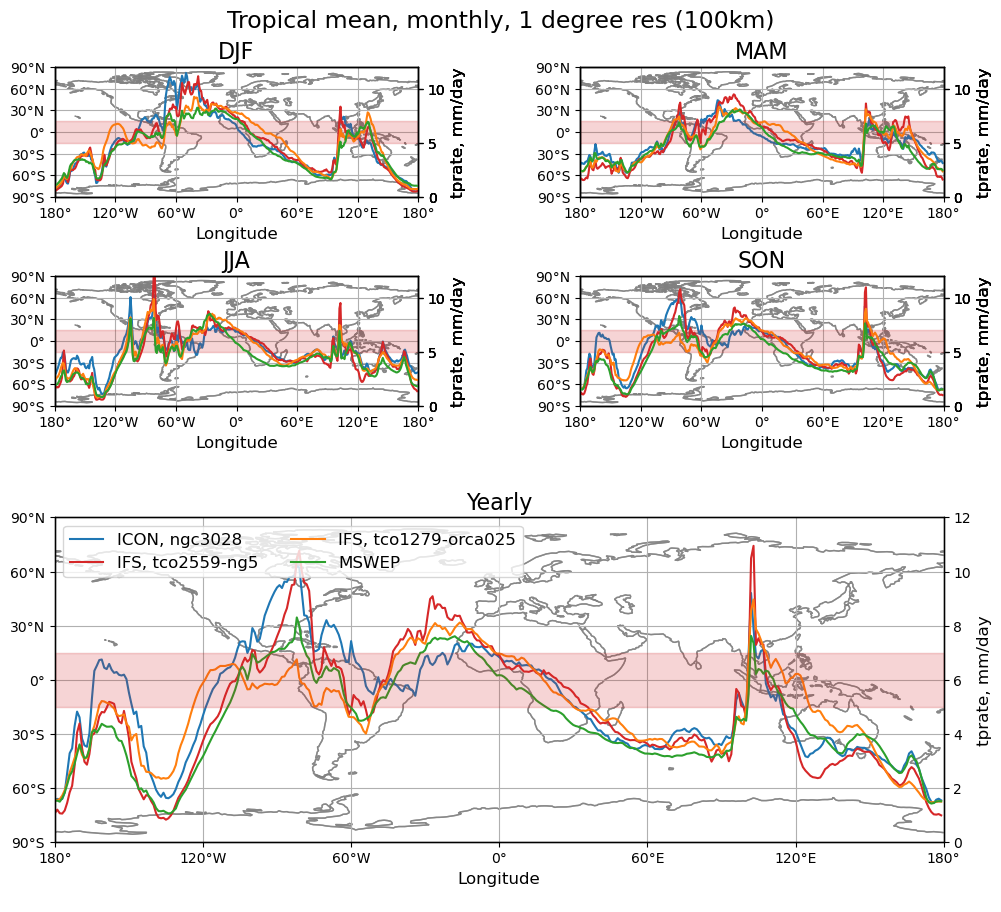

In [4]:
diag.trop_lat=15
add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_icon_ngc3028_lra_lat_2020-09-01T00_2024-11-01T00_histogram.nc",                  
                                legend='ICON, ngc3028',         color='tab:blue', figsize=0.9)

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco2559_ng5_lra_lat_2020-09-15T00_2024-11-15T00_histogram.nc",    
                                fig=add,    
                                legend='IFS, tco2559-ng5',      color='tab:red')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_ifs_tco1279_orca025_lra_lat_2020-09-15T00_2024-11-15T00_histogram.nc", 
                                fig=add,    
                                legend='IFS, tco1279-orca025',  color='tab:orange')

add = diag.plot_of_average(path_to_netcdf=path_to_mean+"trop_rainfall_mswep_mon_lra_lat_1979-09-01T00_2020-11-01T00_histogram.nc",          
                                fig=add,   
                                legend='MSWEP',                 color='tab:green',
                                plot_title='Tropical mean, monthly, 1 degree res (100km)', loc='upper left',
                                path_to_pdf=path_to_pdf,
                                pdf_format=False,
                                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_lra_r100_monthly_comparison_along_lat')

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

2023-07-20 01:43:50 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


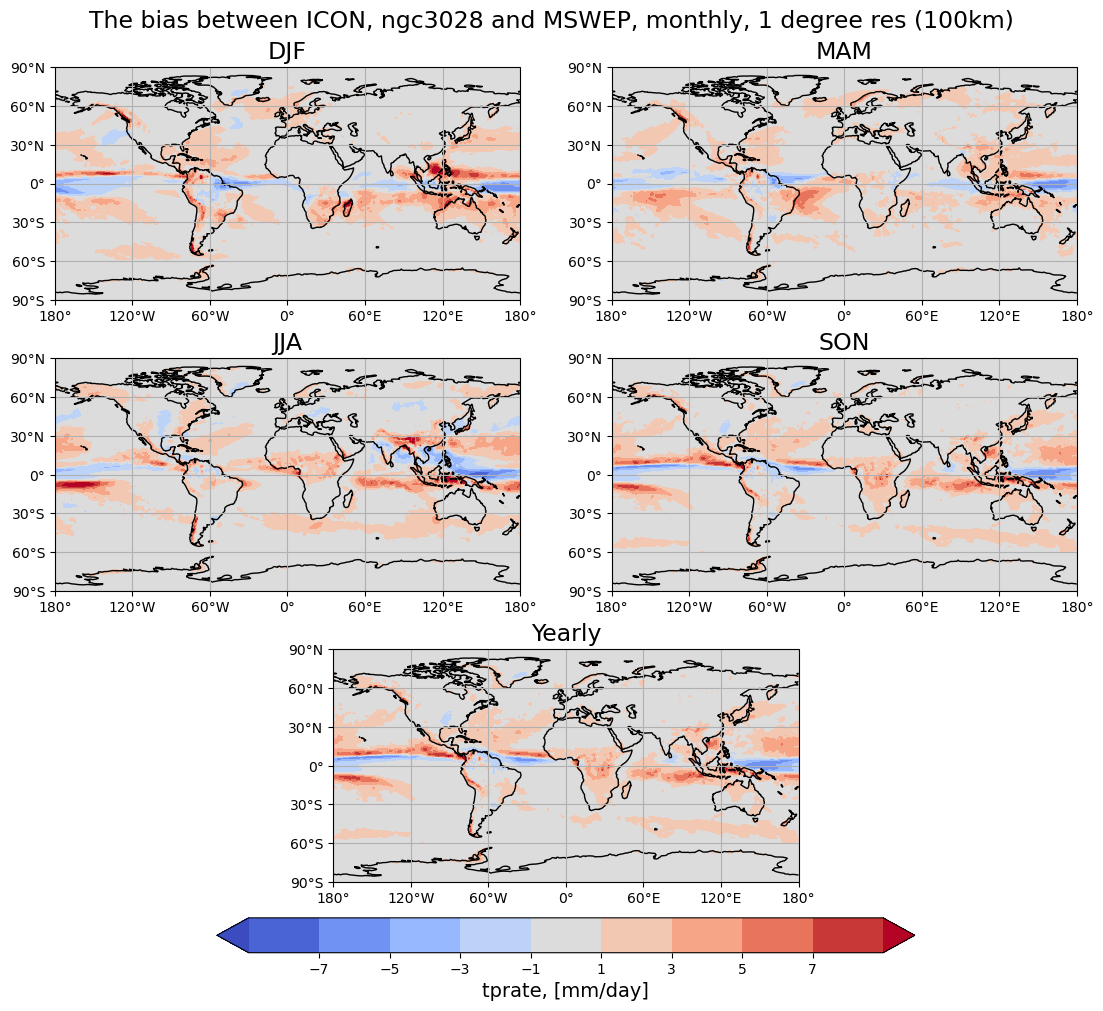

In [18]:
diag.plot_bias(icon_ngc3028, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

2023-07-20 01:45:47 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


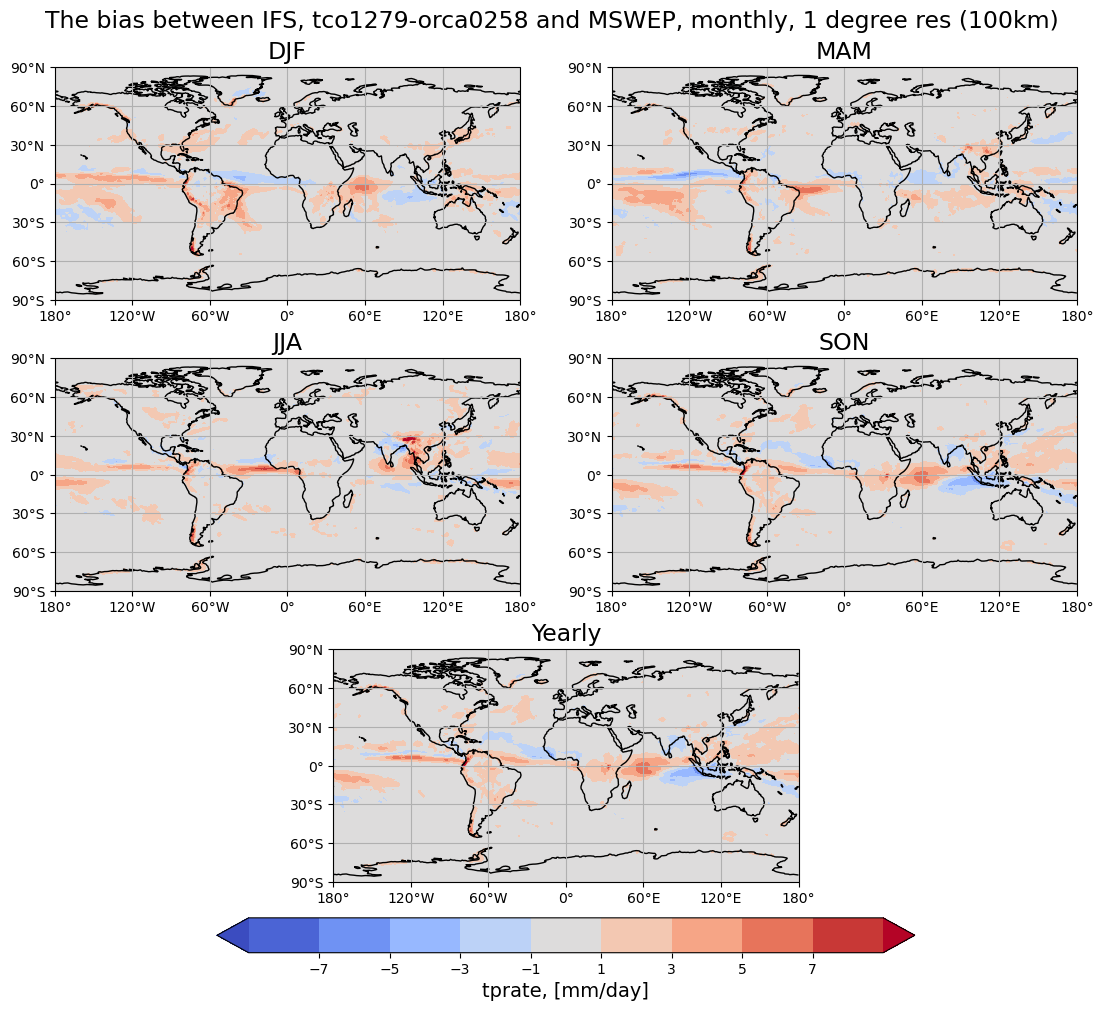

In [19]:
diag.plot_bias(ifs_tco1279_orca025, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco1279-orca0258 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='ifs_tco1279_orca0258_mswep_lra_r100_monthly_bias')

2023-07-20 01:47:00 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


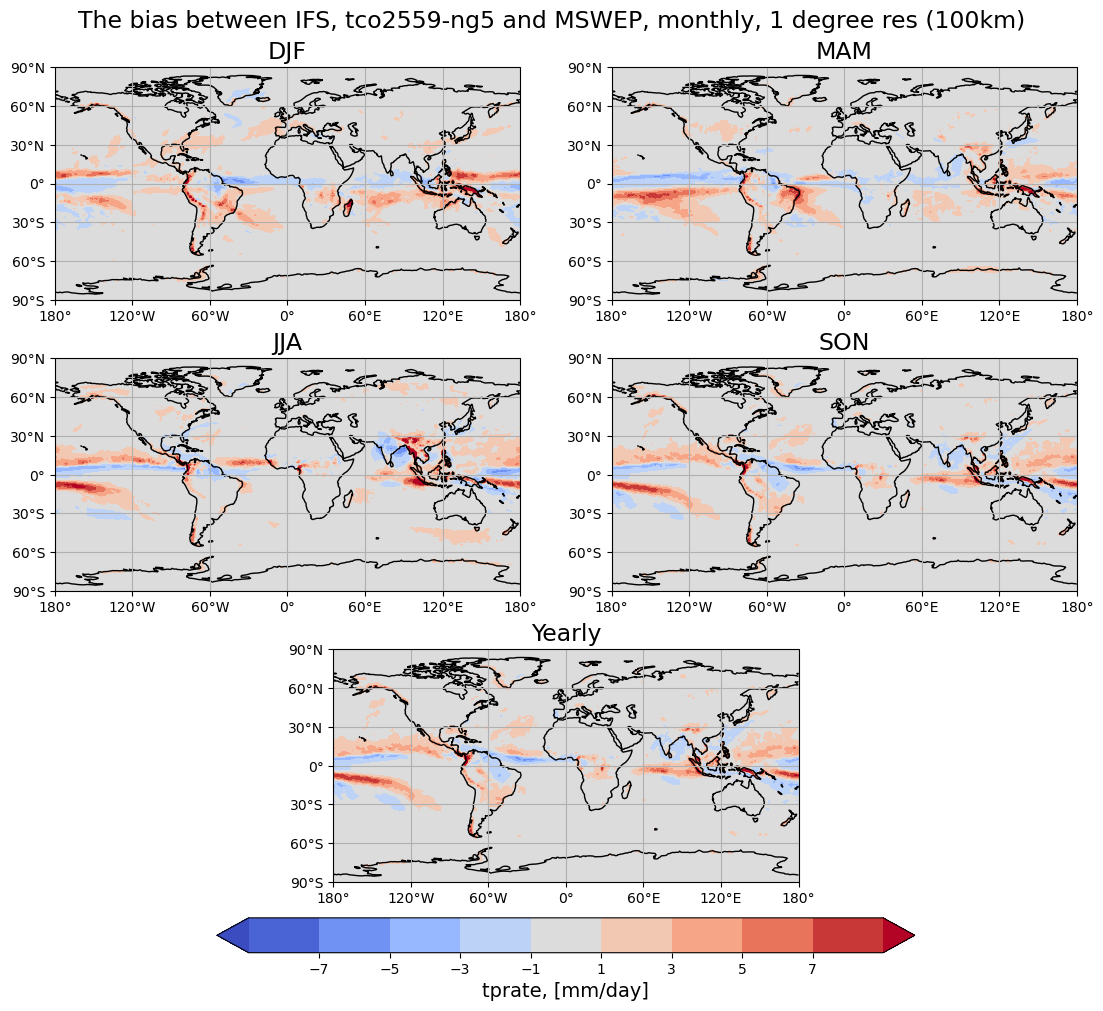

In [20]:
diag.plot_bias(ifs_tco2559_ng5, dataset_2 = mswep_mon, seasons=True, new_unit='mm/day',  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between IFS, tco2559-ng5 and MSWEP, monthly, 1 degree res (100km)',
               path_to_pdf=path_to_pdf, name_of_file='tco2559-ng5_mswep_lra_r100_monthly_bias')

#

## Below is the comparison of high-frequency histograms.

In [3]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = int(1000/1), first_edge = 0, width_of_bin = 1, loglevel='debug')

In [5]:
path_to_ifs='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco2559-ng5-cycle3/'
hist_ifs_2559_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs, multi = None, seasons = False, all = True)

In [6]:
path_to_ifs_orca='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/tco1279-orca025-cycle3/'
hist_ifs_tco1279_high = diag.merge_list_of_histograms(path_to_histograms = path_to_ifs_orca, multi = None, seasons = False, all = True)

In [7]:
path_to_icon='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/PT3H/'
hist_icon_ngc3028_high = diag.merge_list_of_histograms(path_to_histograms = path_to_icon, multi = None,  all = True)

In [29]:
path_to_mswep='/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/mswep_no_fix/'
hist_mswep_high = diag.merge_list_of_histograms(path_to_histograms = path_to_mswep, multi = None,  all = True)

In [24]:
for hist in [hist_ifs_2559_high, hist_ifs_tco1279_high, hist_icon_ngc3028_high, hist_mswep_high]:
    if abs(hist.pdf.sum() -1) < 10**(-4) and  abs(hist.frequency.sum() -1) < 10**(-4):
        print('OK')

OK
OK
OK
OK


2023-07-14 20:49:50 :: create_folder :: WARNING  -> Folder /work/bb1153/b382267/tropical_rainfall_cicle3/PDF/ already exists


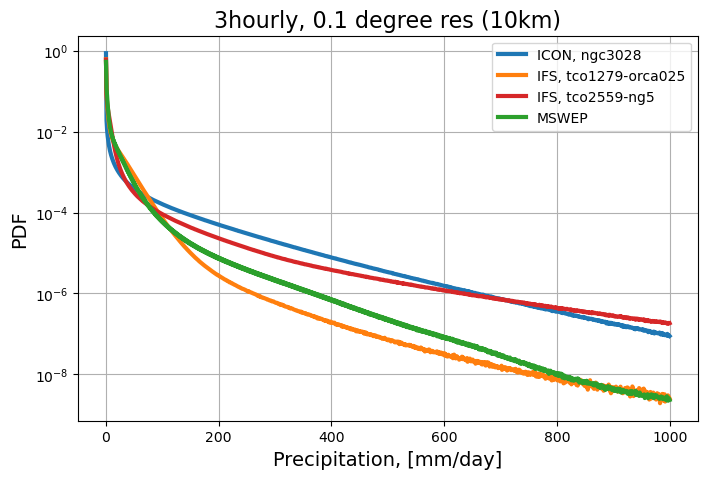

In [31]:
add = diag.histogram_plot(hist_icon_ngc3028_high,   pdf=True,   figsize=1,                         
                legend='ICON, ngc3028')
add = diag.histogram_plot(hist_ifs_tco1279_high.pdf,    pdf=False, frequency=False,   add = add,  color ='tab:orange', 
                legend='IFS, tco1279-orca025') 
add = diag.histogram_plot(hist_ifs_2559_high,       pdf=True,   add = add,  color ='tab:red', 
                legend='IFS, tco2559-ng5') 
add = diag.histogram_plot(hist_mswep_high,          pdf=True,   add = add,  color ='tab:green', 
                legend='MSWEP',  
                plot_title='3hourly, 0.1 degree res (10km)', loc='upper right',
                path_to_pdf=path_to_pdf, 
                pdf_format=False,  
                name_of_file='icon_ngc3028_ifs_tco2559_ng5_ifs_tco1279_orca025_mswep_10km_3h')

##### The end